In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import FIRE as fire
import imp
imp.reload(fire)

<module 'FIRE' from '/media/erik/Samsung_SSD/1_Data/11_Finances/1192_Planning/230806_FIRE/fire-calculator/FIRE.py'>

In [14]:
# Boundary conditions / external effects
all_conditions = fire.FIREExternalConditionsArray('../External.json')
print(f"Available conditions: {all_conditions.keys()}")
conditions = all_conditions.select("SCENARIO_AVERAGE_INFLATION_AND_CAPITAL_TAX")

# Income/assets + Investments
all_investments = fire.FIREInvestmentArray('../Investments.json')
investments = all_investments.select("SCENARIO_1")
print(f"Available investments: {all_investments.keys()}")

# Target
all_targets = fire.FIRETargetArray('../Targets.json')
#target = all_targets.select("SCENARIO_LIVABLE_AGGRESSIVE")
print(f"Available targets: {all_targets.keys()}")

Available conditions: dict_keys(['SCENARIO_AVERAGE_INFLATION_AND_CAPITAL_TAX', 'SCENARIO_WORSTCASE_INFLATION_AND_CAPITAL_TAX'])
Available investments: dict_keys(['SCENARIO_1'])
Available targets: dict_keys(['SCENARIO_RICH_CONSERVATIVE', 'SCENARIO_RICH_AGGRESSIVE', 'SCENARIO_LIVABLE_CONSERVATIVE', 'SCENARIO_LIVABLE_AGGRESSIVE', 'SCENARIO_INCOME_AGGRESSIVE'])


In [15]:
# Build up simulations

all_sims = dict()
for tk, tv in all_targets.items():
    simulation = fire.FIRESimulation(investments=investments, target=tv, conditions=conditions)
    simulation.perform()
    all_sims[tk] = simulation.simulation_retirement_age

Text(0, 0.5, 'Retirement age / [years]')

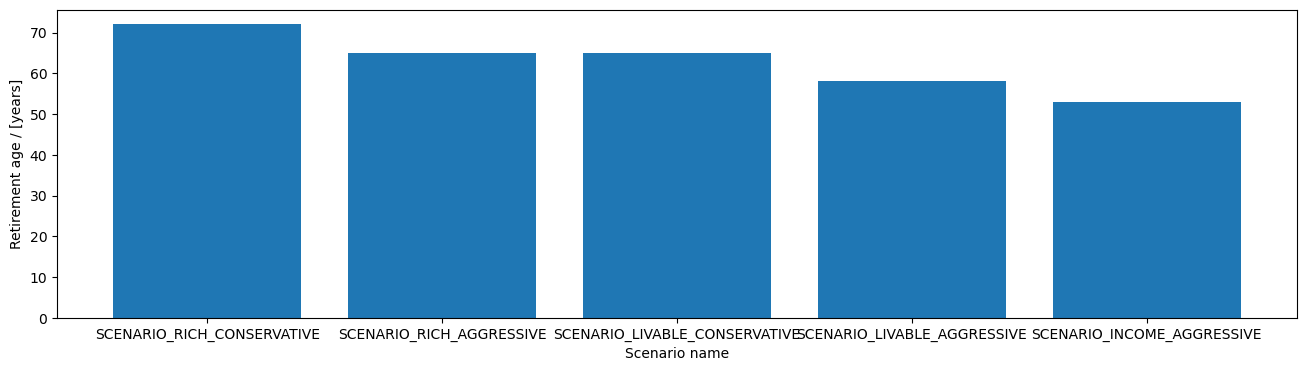

In [17]:
# Plot retirement ages
all_k = [*all_sims.keys()]
all_v = np.array([*all_sims.values()])

plt.figure(figsize=(16, 4))
plt.bar(all_k, all_v)
plt.xlabel("Scenario name")
plt.ylabel("Retirement age / [years]")
for ii,(d,v) in enumerate(zip(all_k, all_v)):
    col = "black"
    plt.text(ii, v,f"{v:.2f}%{add_text}", ha = 'center', va='bottom', c=col)
